In [1]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as p3
import numpy as np
import random
import time

from functools import partial
from ipywidgets import interact, RadioButtons, IntSlider, FloatSlider, Dropdown, BoundedFloatText
from numpy.linalg import norm

random.seed(42) # начальное состояние генератора случайных чисел, чтобы можно было воспроизводить результаты.

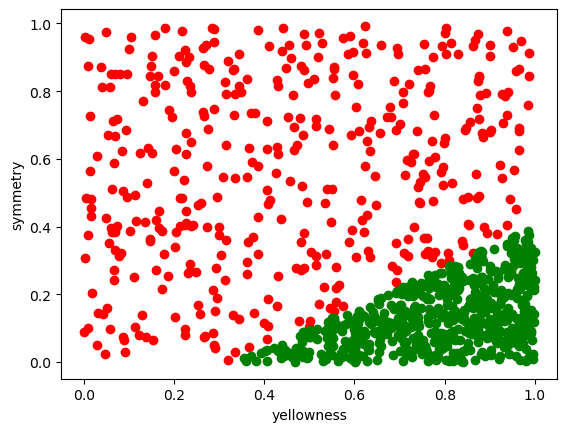

In [47]:
%matplotlib inline
data = np.loadtxt("data.csv", delimiter=",")
pears = data[:, 2] == 1
apples = np.logical_not(pears)
plt.scatter(data[apples][:, 0], data[apples][:, 1], color = "red")
plt.scatter(data[pears][:, 0], data[pears][:, 1], color = "green")
plt.xlabel("yellowness")
plt.ylabel("symmetry")
plt.show()

In [100]:
data

array([[0.77942731, 0.25730527, 1.        ],
       [0.77700501, 0.0159154 , 1.        ],
       [0.97709225, 0.30420962, 1.        ],
       ...,
       [0.92721921, 0.13498618, 1.        ],
       [0.01582991, 0.48132194, 0.        ],
       [0.96796389, 0.30857107, 1.        ]])

In [101]:
data = np.hstack((np.ones(shape=[data.shape[0], 1]), data))

In [102]:
data

array([[1.        , 0.77942731, 0.25730527, 1.        ],
       [1.        , 0.77700501, 0.0159154 , 1.        ],
       [1.        , 0.97709225, 0.30420962, 1.        ],
       ...,
       [1.        , 0.92721921, 0.13498618, 1.        ],
       [1.        , 0.01582991, 0.48132194, 0.        ],
       [1.        , 0.96796389, 0.30857107, 1.        ]])

In [34]:
from Neuron import Neuron
from Neuron import J_quadratic

In [43]:
from sklearn.model_selection import train_test_split

In [103]:
X = data[:, :-1]
y = data[:, -1]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [120]:
(y_train == 0).sum()

293

In [121]:
weights = np.zeros(shape=[X.shape[1], 1])
weights[0] = 1

In [122]:
neuron = Neuron(weights)

In [131]:
neuron.SGD(X_train, y_train, batch_size=int(X_train.shape[0] / 50), learning_rate=0.01, max_steps=1000)

In [132]:
neuron.w

array([[1.],
       [0.],
       [0.]])

In [109]:
y_pred = neuron.vectorized_forward_pass(X_test)

In [110]:
y_pred = np.where(y_pred > 0.5, 1, 0)

In [111]:
y_pred

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [112]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [113]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [114]:
disp = ConfusionMatrixDisplay(conf_matrix)

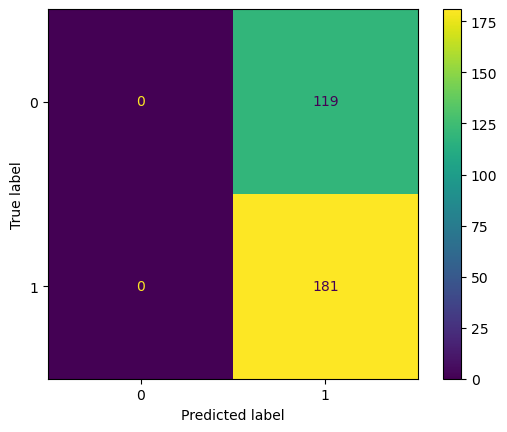

In [115]:
disp.plot()

In [195]:
w = np.array([[0.23684337], [1.2415097], [-2.31129894]])

In [196]:
second_neuron = Neuron(w)

In [197]:
y_pred = second_neuron.vectorized_forward_pass(X_test)

In [198]:
y_pred = np.where(y_pred > 0.5, 1, 0)

In [199]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [200]:
disp = ConfusionMatrixDisplay(conf_matrix)

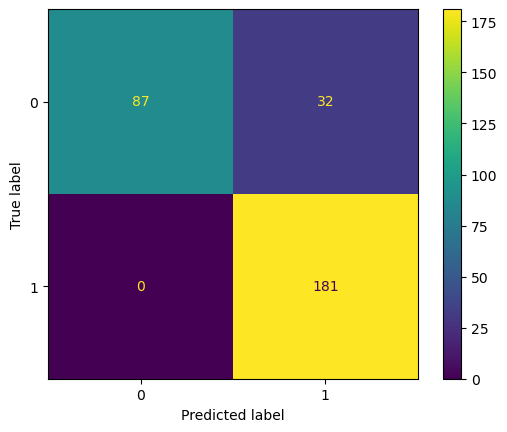

In [201]:
disp.plot()

In [202]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0 , 1, 1, 0])

model = keras.Sequential([
    keras.layers.Dense(2, activation=tf.math.sigmoid),
    keras.layers.Dense(1, activation=tf.math.sigmoid)
])


model.compile(optimizer=tf.train.GradientDescentOptimizer(1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x, y, epochs=5000)

print(model.get_weights())

ModuleNotFoundError: No module named 'tensorflow'